# Important Library

In [1]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Dataset

In [2]:
breast_imgs = glob.glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)

# Data Visualization

In [3]:
for imgname in breast_imgs[:5]:
    print(imgname)

../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png


In [4]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0' :
        non_cancer_imgs.append(img)
    
    elif img[-5] == '1' :
        cancer_imgs.append(img)

In [5]:
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer   
total_img_num = non_cancer_num + cancer_num        
print('Number of Images of no cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(cancer_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png
Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


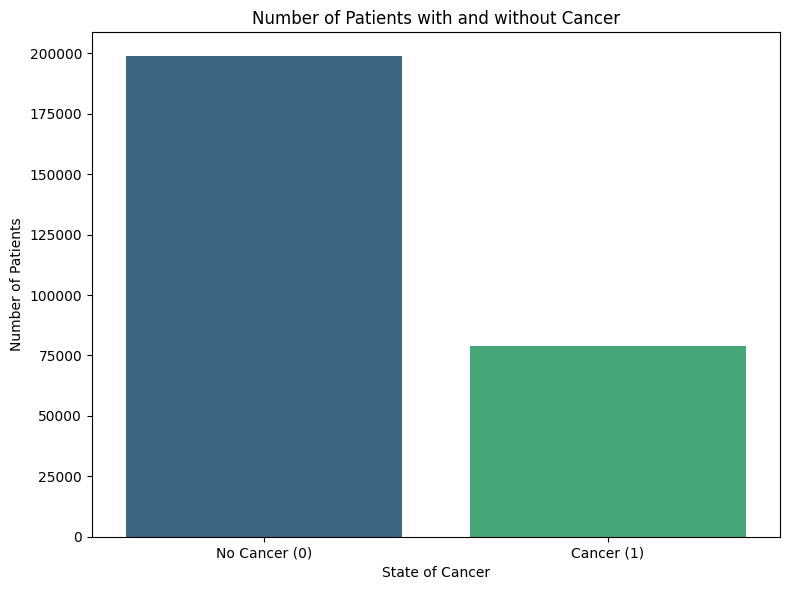

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Print first 5 image paths
for imgname in breast_imgs[:5]:
    print(imgname)

# Initialize lists to hold image paths based on cancer state
non_cancer_imgs = []
cancer_imgs = []

# Categorize images based on the fifth character from the end in the filename
for img in breast_imgs:
    if img[-5] == '0':
        non_cancer_imgs.append(img)
    elif img[-5] == '1':
        cancer_imgs.append(img)

# Calculate counts
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)          # Cancer 
total_img_num = non_cancer_num + cancer_num

# Print counts
print('Number of Images of no cancer: {}'.format(non_cancer_num))   # Images of Non-cancer
print('Number of Images of cancer : {}'.format(cancer_num))          # Images of cancer 
print('Total Number of Images : {}'.format(total_img_num))

# Visualization 1: Number of Patients with and without Cancer
data_insight_1 = pd.DataFrame({
    'State of Cancer': ['No Cancer (0)', 'Cancer (1)'],
    'Number of Patients': [non_cancer_num, cancer_num]
})

plt.figure(figsize=(8,6))
sns.barplot(x='State of Cancer', y='Number of Patients', data=data_insight_1, palette='viridis')
plt.title('Number of Patients with and without Cancer')
plt.xlabel('State of Cancer')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

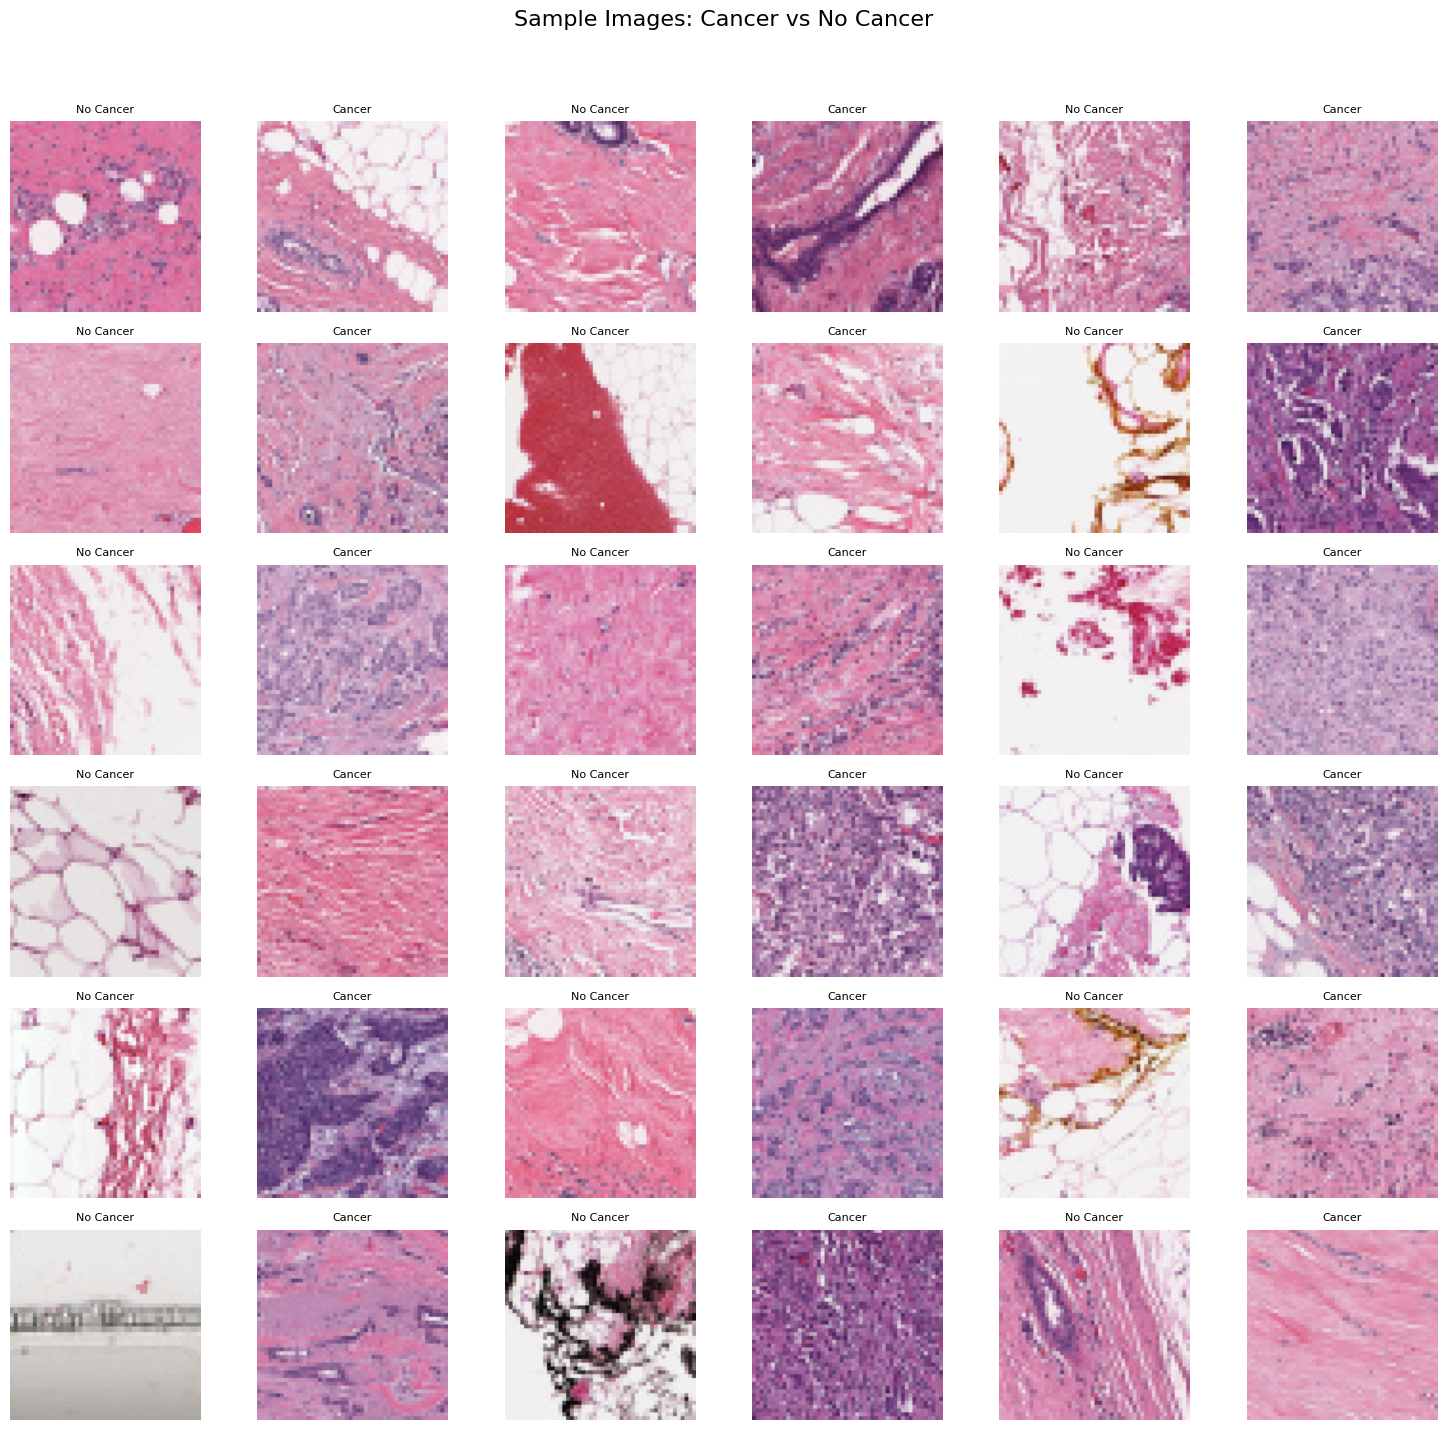

In [7]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# If using Jupyter Notebook, ensure plots are displayed inline
%matplotlib inline

# Set up the figure for plotting images
plt.figure(figsize=(15, 15))

# Select 18 random unique indices for non-cancer and cancer images
some_non = np.random.choice(len(non_cancer_imgs), 18, replace=False)
some_can = np.random.choice(len(cancer_imgs), 18, replace=False)

# Plot Non-Cancer Images
for i, num in enumerate(some_non):
    try:
        img_path = non_cancer_imgs[num]
        img = load_img(img_path, target_size=(100, 100))
        img = img_to_array(img)
        
        # Calculate subplot index: 2*i + 1
        plt.subplot(6, 6, 2*i + 1)
        plt.axis('off')
        plt.title('No Cancer', fontsize=8)
        plt.imshow(img.astype('uint8'))
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        continue

# Plot Cancer Images
for i, num in enumerate(some_can):
    try:
        img_path = cancer_imgs[num]
        img = load_img(img_path, target_size=(100, 100))
        img = img_to_array(img)
        
        # Calculate subplot index: 2*i + 2
        plt.subplot(6, 6, 2*i + 2)
        plt.axis('off')        
        plt.title('Cancer', fontsize=8)
        plt.imshow(img.astype('uint8'))
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        continue

plt.suptitle('Sample Images: Cancer vs No Cancer', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

# Data Modeling

In [8]:
import cv2
import random
from tqdm import tqdm  # Import tqdm for the progress bar

# Randomly sample images from two lists
some_non_img = random.sample(non_cancer_imgs, len(non_cancer_imgs))
some_can_img = random.sample(cancer_imgs, len(cancer_imgs))

# Initialize empty arrays to store image data and labels
non_img_arr = []  # Array for non-cancer images
can_img_arr = []  # Array for cancer images

# Process non-cancer images with a progress bar
for img in tqdm(some_non_img, desc="Processing non-cancer images", unit="image"):
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

# Process cancer images with a progress bar
for img in tqdm(some_can_img, desc="Processing cancer images", unit="image"):
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

Processing cancer images: 100%|██████████| 78786/78786 [05:44<00:00, 228.74image/s]


In [9]:
X = []  # List for image data
y = []  # List for labels

# Concatenate the arrays 'non_img_arr' and 'can_img_arr' into a single array 'breast_img_arr'
breast_img_arr = np.concatenate((non_img_arr, can_img_arr))

# Shuffle the elements in the 'breast_img_arr' array randomly
random.shuffle(breast_img_arr)

# Loop through each element (feature, label) in the shuffled 'breast_img_arr'
for feature, label in breast_img_arr:
    # Append the image data (feature) to the 'X' list
    X.append(feature)
    # Append the label to the 'y' list
    y.append(label)

# Convert the lists 'X' and 'y' into NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of the 'X' array
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(y.shape))

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


X shape: (277524, 50, 50, 3)
Y shape: (277524,)


# Split the dataset into training and testing sets, with a test size of 20%

In [10]:
# Split the dataset into training and testing sets, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define a rate (percentage) for subsampling the training data
rate = 0.5

# Calculate the number of samples to keep in the training data based on the rate
num = int(X.shape[0] * rate)

# Convert the categorical labels in 'y_train' and 'y_test' to one-hot encoded format
y_train = to_categorical(y_train, 2)  # Assuming there are 2 classes (non-cancer and cancer)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (222019, 50, 50, 3)
X_test shape : (55505, 50, 50, 3)
y_train shape : (222019, 2)
y_test shape : (55505, 2)


In [11]:
"""import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from collections import Counter
import pandas as pd

# ---------------------------
# 1. Data Preparation
# ---------------------------

# Assume X and y are already defined
# For demonstration, let's create a mock dataset
# Uncomment and modify the following lines if you need to create a sample dataset
# import numpy as np
# X = np.random.rand(1000, 20)  # 1000 samples, 20 features
# y = np.random.randint(0, 2, 1000)  # Binary classification: 0 (Non-Cancer), 1 (Cancer)

# Example (remove or replace with your actual data)
# X, y should be defined before this step
# For demonstration, let's assume y has 2 classes: 0 and 1

# ---------------------------
# 2. Splitting the Dataset
# ---------------------------

# Split the dataset into training and testing sets with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ---------------------------
# 3. Calculating Class Distributions
# ---------------------------

# Count the occurrences of each class in training and testing sets
train_counts = Counter(y_train)
test_counts = Counter(y_test)

# Convert counts to Pandas Series for easier manipulation
train_series = pd.Series(y_train)
test_series = pd.Series(y_test)

# ---------------------------
# 4. Visualization
# ---------------------------

# Set the visual style
sns.set(style="whitegrid")

# Create a DataFrame for easier plotting with Seaborn
distribution_df = pd.DataFrame({
    'Class': ['Non-Cancer', 'Cancer'],
    'Training Set': [train_counts[0], train_counts[1]],
    'Testing Set': [test_counts[0], test_counts[1]]
})

# Melt the DataFrame to long-form for Seaborn
distribution_melted = distribution_df.melt(id_vars='Class', var_name='Dataset', value_name='Count')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a grouped barplot
sns.barplot(x='Class', y='Count', hue='Dataset', data=distribution_melted, palette="Set2")

# Add titles and labels
plt.title('Class Distribution in Training and Testing Sets', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)

# Adjust the legend title
plt.legend(title='Dataset')

# Annotate bar values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2., height + 5,
        int(height),
        ha="center"
    )

# Improve layout and display the plot
plt.tight_layout()
plt.show()

# ---------------------------
# 5. Subsampling (Optional)
# ---------------------------

# Define a rate (percentage) for subsampling the training data
rate = 0.5

# Calculate the number of samples to keep in the training data based on the rate
num = int(X_train.shape[0] * rate)

# Subsample the training data
X_train_sub = X_train[:num]
y_train_sub = y_train[:num]

# Optional: Display class distribution after subsampling
subsample_counts = Counter(y_train_sub)
print("\nAfter Subsampling:")
print("Training set:", subsample_counts)

# ---------------------------
# 6. One-Hot Encoding
# ---------------------------

# Convert the categorical labels in 'y_train_sub' and 'y_test' to one-hot encoded format
y_train_encoded = to_categorical(y_train_sub, num_classes=2)  # Assuming 2 classes
y_test_encoded = to_categorical(y_test, num_classes=2)

# Print shapes of the datasets
print('\nDataset Shapes:')
print('X_train_sub shape : {}'.format(X_train_sub.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_train_encoded shape : {}'.format(y_train_encoded.shape))
print('y_test_encoded shape : {}'.format(y_test_encoded.shape))
"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\nfrom keras.utils import to_categorical\nfrom collections import Counter\nimport pandas as pd\n\n# ---------------------------\n# 1. Data Preparation\n# ---------------------------\n\n# Assume X and y are already defined\n# For demonstration, let\'s create a mock dataset\n# Uncomment and modify the following lines if you need to create a sample dataset\n# import numpy as np\n# X = np.random.rand(1000, 20)  # 1000 samples, 20 features\n# y = np.random.randint(0, 2, 1000)  # Binary classification: 0 (Non-Cancer), 1 (Cancer)\n\n# Example (remove or replace with your actual data)\n# X, y should be defined before this step\n# For demonstration, let\'s assume y has 2 classes: 0 and 1\n\n# ---------------------------\n# 2. Splitting the Dataset\n# ---------------------------\n\n# Split the dataset into training and testing sets with stratification to preserve class distribution\nX_tra

# Data Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generators for training and testing
train_datagen = datagen.flow(X_train, y_train, batch_size=32)
test_datagen = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

# Define an EarlyStopping & ReduceLROnPlateau callback

In [13]:
# Define an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Number of epochs with no improvement after which training will be stopped
    min_delta=1e-7,              # Minimum change in the monitored quantity to be considered an improvement
    restore_best_weights=True,   # Restore model weights from the epoch with the best value of monitored quantity
)

# Define a ReduceLROnPlateau callback
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=2,           # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,       # Minimum change in the monitored quantity to trigger a learning rate reduction
    cooldown=0,           # Number of epochs to wait before resuming normal operation after learning rate reduction
    verbose=1             # Verbosity mode (1: update messages, 0: no messages)
)

# Create a Sequential model

In [14]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

# Create a Sequential model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 2x2 pool size and default stride (2)
    tf.keras.layers.MaxPooling2D(strides=2),
    
    # Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Flatten the output to prepare for fully connected layers
    tf.keras.layers.Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # Output layer with 2 units (binary classification) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

# Display a summary of the model architecture
model.summary()

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 64)       256       
 hNormalization)                                                 
                                                        

In [15]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 25,
                    batch_size = 75,
                    callbacks=[early_stopping, plateau])

Epoch 1/25
2961/2961 [==============================] - 41s 12ms/step - loss: 0.1301 - accuracy: 0.9565 - val_loss: 0.1766 - val_accuracy: 0.9548 - lr: 0.0010
Epoch 2/25
2961/2961 [==============================] - 34s 11ms/step - loss: 0.1175 - accuracy: 0.9592 - val_loss: 0.3423 - val_accuracy: 0.9036 - lr: 0.0010
Epoch 3/25
2961/2961 [==============================] - 34s 12ms/step - loss: 0.1122 - accuracy: 0.9608 - val_loss: 0.1119 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 4/25
2961/2961 [==============================] - 35s 12ms/step - loss: 0.1083 - accuracy: 0.9621 - val_loss: 0.1740 - val_accuracy: 0.9559 - lr: 0.0010
Epoch 5/25
2956/2961 [============================>.] - ETA: 0s - loss: 0.1050 - accuracy: 0.9633
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2961/2961 [==============================] - 35s 12ms/step - loss: 0.1050 - accuracy: 0.9633 - val_loss: 0.1331 - val_accuracy: 0.9582 - lr: 0.0010
Epoch 6/25
2961/2961 [===================

# Model Evaluatation

In [16]:
model.evaluate(X_test,y_test)

1735/1735 [==============================] - 5s 3ms/step - loss: 0.0979 - accuracy: 0.9686


[0.09792300313711166, 0.9685614109039307]

1735/1735 [==============================] - 3s 2ms/step


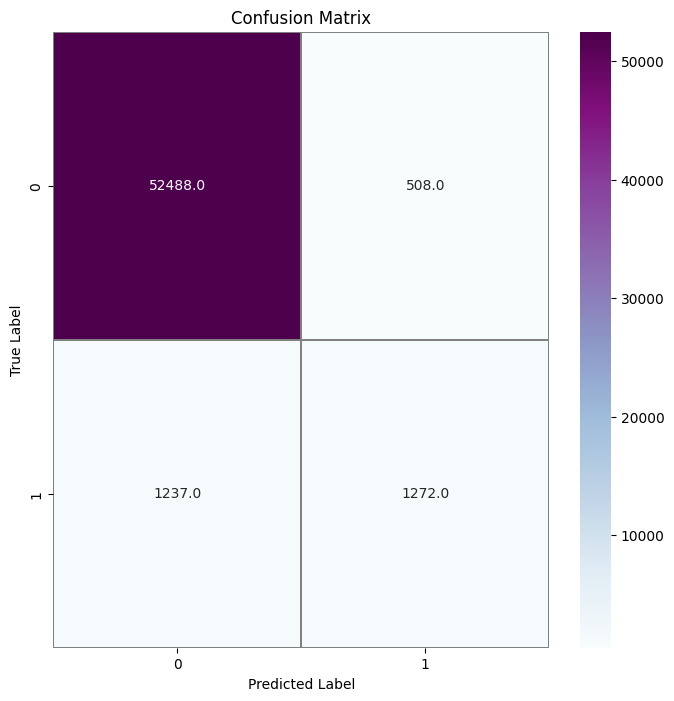

In [17]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [29]:
from sklearn.metrics import classification_report
# Classification report
print("Classification Report:")
print(classification_report(Y_true, Y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52996
           1       0.71      0.51      0.59      2509

    accuracy                           0.97     55505
   macro avg       0.85      0.75      0.79     55505
weighted avg       0.97      0.97      0.97     55505



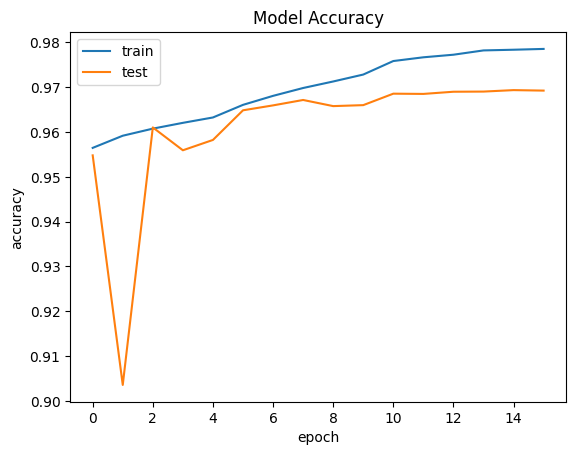

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

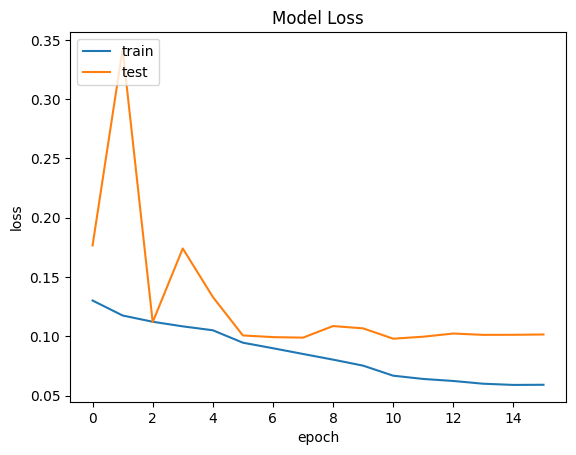

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
prediction = model.predict(X_test)
prediction

1735/1735 [==============================] - 3s 2ms/step


array([[1.0000000e+00, 3.2486234e-13],
       [9.9999976e-01, 2.5538378e-07],
       [9.9999905e-01, 9.0931962e-07],
       ...,
       [9.9995840e-01, 4.1655137e-05],
       [9.9999976e-01, 2.0768240e-07],
       [1.0000000e+00, 4.9351803e-16]], dtype=float32)

### Testing the Model

1/1 [==============================] - 0s 136ms/step
Predicted Diagnosis: Non-Cancerous
Calcification Type: No Calcification
True Diagnosis: Non-Cancerous


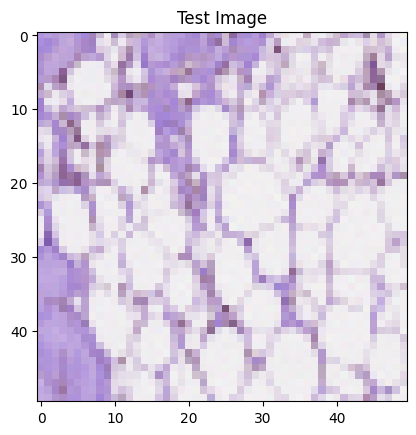

In [21]:
# Define a mapping of class indices to human-readable labels
class_labels = {
    0: 'Non-Cancerous',
    1: 'Cancerous',
}

# Define a mapping of calcification types
calcification_types = {
    0: 'No Calcification',
    1: 'PLEOMORPHIC',
    2: 'AMORPHOUS',
    3: 'PUNCTATE',
    4: 'LUCENT_CENTER',
    5: 'VASCULAR',
    6: 'FINE_LINEAR_BRANCHING',
    7: 'COARSE',
    8: 'ROUND_AND_REGULAR-LUCENT_CENTER',
    9: 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
    10: 'ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE',
    11: 'ROUND_AND_REGULAR-EGGSHELL',
    12: 'PUNCTATE-PLEOMORPHIC',
    13: 'DYSTROPHIC',
    14: 'LUCENT_CENTERED',
    15: 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
    16: 'ROUND_AND_REGULAR',
    17: 'ROUND_AND_REGULAR-LUCENT_CENTERED',
    18: 'AMORPHOUS-PLEOMORPHIC',
    19: 'LARGE_RODLIKE-ROUND_AND_REGULAR',
    20: 'PUNCTATE-AMORPHOUS',
    21: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER',
    22: 'VASCULAR-COARSE-LUCENT_CENTERED',
    23: 'LUCENT_CENTER-PUNCTATE',
    24: 'ROUND_AND_REGULAR-PLEOMORPHIC',
    25: 'EGGSHELL',
    26: 'PUNCTATE-FINE_LINEAR_BRANCHING',
    27: 'VASCULAR-COARSE',
    28: 'ROUND_AND_REGULAR-PUNCTATE',
    29: 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
    30: 'SKIN-PUNCTATE',
    31: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
    32: 'PUNCTATE-ROUND_AND_REGULAR',
    33: 'LARGE_RODLIKE',
    34: 'AMORPHOUS-ROUND_AND_REGULAR',
    35: 'PUNCTATE-LUCENT_CENTER',
    36: 'SKIN',
    37: 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA',
    38: 'COARSE-PLEOMORPHIC',
    39: 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
    40: 'COARSE-LUCENT_CENTER',
    41: 'MILK_OF_CALCIUM',
    42: 'COARSE-ROUND_AND_REGULAR',
    43: 'SKIN-COARSE-ROUND_AND_REGULAR',
    44: 'ROUND_AND_REGULAR-AMORPHOUS',
    45: 'PLEOMORPHIC-PLEOMORPHIC'
}

# Define a function for plotting an image from an array
def img_plot(arr, index=0):
    # Set the title for the plot
    plt.title('Test Image')
    
    # Display the image at the specified index in the array
    plt.imshow(arr[index])

# Set the index value to 90
index = 90

# Plot an image from the X_test array using the img_plot function
img_plot(X_test, index)

# Extract a single image from X_test based on the specified index
input = X_test[index:index+1]

# Make a prediction using the CNN model and get the class with the highest probability
predicted_class_index = model.predict(input)[0].argmax()

# Get the true label from the y_test array
true_class_index = y_test[index].argmax()

# Get the predicted and true labels
predicted_label = class_labels[predicted_class_index]
true_label = class_labels[true_class_index]

# Get the calcification type based on the predicted class index (modify as needed)
calcification_type = calcification_types[predicted_class_index]

# Print the prediction result with calcification type
print('Predicted Diagnosis:', predicted_label)
print('Calcification Type:', calcification_type)
print('True Diagnosis:', true_label)

1/1 [==============================] - 0s 18ms/step


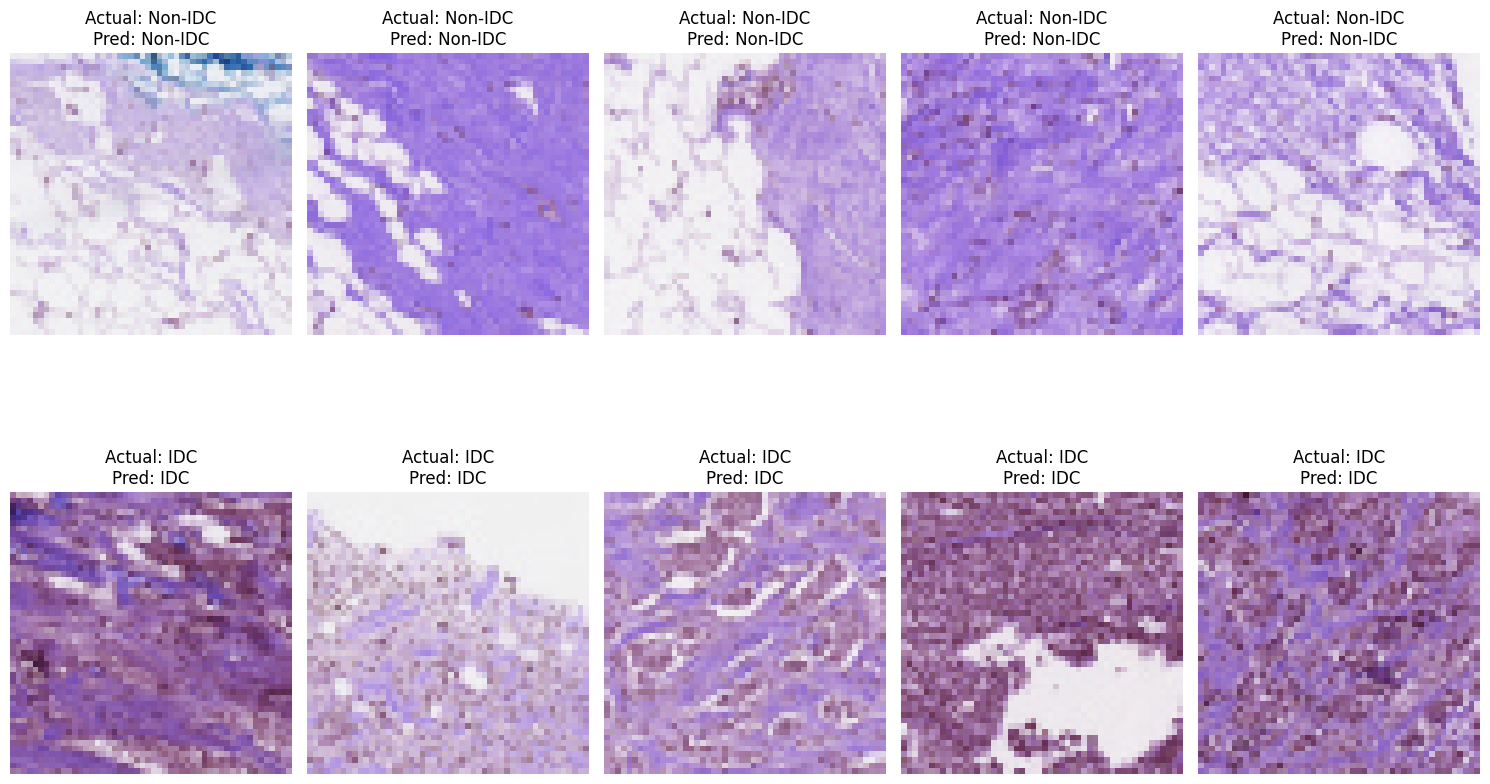

In [27]:
# Define a mapping of class indices to human-readable labels
class_labels = {
    0: 'Non-IDC',
    1: 'IDC',
}

"""# Define a mapping of calcification types
calcification_types = {
    0: 'No Calcification',
    1: 'PLEOMORPHIC',
    2: 'AMORPHOUS',
    3: 'PUNCTATE',
    4: 'LUCENT_CENTER',
    # ... (other calcification types remain unchanged)
    45: 'PLEOMORPHIC-PLEOMORPHIC'
}"""

# Define a function for plotting multiple images with predictions
def plot_predictions(X_test, y_test, model, num_images=5):
    import matplotlib.pyplot as plt
    
    # Initialize counters for each class
    class_count = {0: 0, 1: 0}
    max_per_class = num_images
    
    plt.figure(figsize=(15, 10))  # Adjust the figure size
    
    for i in range(len(X_test)):
        if class_count[0] >= max_per_class and class_count[1] >= max_per_class:
            break  # Stop once we have enough images for both classes
        
        # Extract the image and true label
        input_image = X_test[i:i+1]
        true_class_index = y_test[i].argmax()
        
        # Skip if the class quota is already filled
        if class_count[true_class_index] >= max_per_class:
            continue
        
        # Make a prediction
        predicted_class_index = model.predict(input_image)[0].argmax()
        predicted_label = class_labels[predicted_class_index]
        true_label = class_labels[true_class_index]
        #calcification_type = calcification_types.get(predicted_class_index, 'Unknown')
        
        # Plot the image with the prediction
        plt.subplot(2, max_per_class, class_count[true_class_index] + 1 + true_class_index * max_per_class)
        plt.imshow(X_test[i])
        plt.title(f"Actual: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
        
        # Increment the counter for the true class
        class_count[true_class_index] += 1
    
    plt.tight_layout()
    plt.show()

# Call the function to plot 5 images for each class
plot_predictions(X_test, y_test, model, num_images=5)

#### Saving the model

In [22]:
model.save('CNN_model.h5')